<a href="https://colab.research.google.com/github/walidwindev/DA-100KO-Analyzing-Data-with-Power-BI/blob/master/Recommande_garantie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd


# Import data

In [ ]:
#/walid_ml.csv
#/content/drive/MyDrive/recommande_ml/walid_ml.csv

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/recommande_ml/walid_ml.csv' ,sep=',')

print(df.to_string()) 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#trie selon garantie
#df[df.CODPROD.eq(521)].sort_values(by=['GARANTIE' ]).tail(20)

#Analyse des corrélations

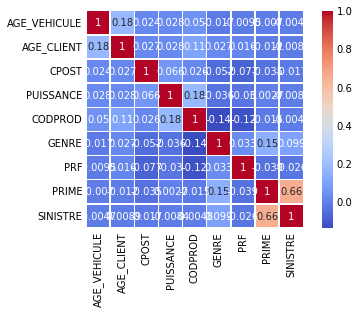

In [ ]:
# Matrice des corrélations : 
import seaborn as sns
cor = df.corr(method ='pearson') 
sns.heatmap(cor, square = True, cmap="coolwarm",linewidths=.5,annot=True )




# Préprocessing

## Function transformer

In [ ]:
def transformer(dfinitial):

  dfX=dfinitial


#GOUVERNORAT
  dfX=dfX.replace({'MARQUE' : { 
                                  'RENAULT' : 1,
                                  'PEUGEOT' : 2 ,
                                  'VOLKSWAGEN' : 3     ,
                                  'CITROEN'  : 4    ,  
                                  'FIAT': 5 ,           
                                  'ISUZU'  : 6      ,  
                                  'KIA'    : 7        ,
                                  'TOYOTA' : 8 ,
                                  'FORD'    : 9       ,
                                  'OPEL'       : 10    ,
                                  'HYUNDAI' : 11 ,
                                  'AUTRES' : 12
                               
                               }})
 
     
  

#GOUVERNORAT
  dfX=dfX.replace({'GOUVERNOR' : { 
                                  'ARIANA' :	'G.TUNIS' ,
                                  'BEJA' :	'NORD' ,
                                  'BEN AROUS'	:'G.TUNIS' ,
                                  'BIZERTE'	:'NORD' ,
                                  'GABES'	:'SUD' ,
                                  'GAFSA'	:'SUD' ,
                                  'JENDOUBA'	:'NORD' ,
                                  'KAIROUAN'	:'CENTRE' ,
                                  'KASSERINE'	:'CENTRE' ,
                                  'KEBILI'	:'SUD' ,
                                  'KEF'	:'NORD' ,
                                  'MAHDIA'	:'SAHEL' ,
                                  'MANNOUBA'	:'G.TUNIS' ,
                                  'MEDENINE'	:'SUD' ,
                                  'MONASTIR'	:'SAHEL' ,
                                  'NABEUL'	:'NORD' ,
                                  'SFAX'	:'SFAX' ,
                                  'SIDI'	:'BOUZID	SUD' ,
                                  'SILIANA'	:'NORD' ,
                                  'SOUSSE'	:'SAHEL' ,
                                  'TATAOUINE'	:'SUD' ,
                                  'TOZEUR'	:'SUD' ,
                                  'TUNIS'	:'G.TUNIS' ,
                                  'ZAGHOUAN'	:'NORD' 
                                  }})

  for i in dfX.index: 
     
      
      if (str(dfX["GOUVERNOR"][i])  not in ('NORD' , 'CENTRE' , 'SUD' , 'G.TUNIS')):
        dfX["GOUVERNOR"][i]='AUTRES'

  dfX['GOUVERNOR'] = dfX['GOUVERNOR'].replace(['old value'],'new value')
  dfX=dfX.replace({'GOUVERNOR' : {
                  'G.TUNIS': 1 ,
                  'NORD': 2 ,
                  'CENTRE': 3 ,
                  'SAHEL' : 4 ,
                  'SFAX': 5 ,
                  'SUD' : 6 ,
                  'AUTRES' : 7
                  }})
 
  return dfX


## Nettoyage des colonnes

In [ ]:
df=df.dropna()

In [ ]:
df['TR']=df['GARANTIE'].str.contains('TR' )
df['DOC']=df['GARANTIE'].str.contains('DOC')
df['BG']=df['GARANTIE'].str.contains('BG')
df['ASS']=df['GARANTIE'].str.contains('ASS')
df['IC']=df['GARANTIE'].str.contains('IC')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
dfinal=df
dfinal=df[[ 'CODPROD','MARQUE', 'AGE_VEHICULE' ,'PUISSANCE' ,'AGE_CLIENT' , 'GOUVERNOR' , 'GENRE' , 'PRF', 'PRIME' ,	'SINISTRE' , 
           'DOC'	,'TR'	, 'BG' ,	'ASS' , 'IC'  ]]

In [ ]:
dfinal['sp']=dfinal['SINISTRE']/dfinal['PRIME']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:


# dummy_Marque=pd.get_dummies(dfinal.MARQUE , prefix='Marque' )
# dfmerge = pd.merge(
#     left=dfinal,
#     right=dummy_Marque,
#     left_index=True,
#     right_index=True,
# )
# dfmerge.drop('MARQUE', axis=1, inplace=True)
#GOUVERNOR
# dfinal=transformer(dfmerge)
dfinal=transformer(dfinal)
dfinal.tail(5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,CODPROD,MARQUE,AGE_VEHICULE,PUISSANCE,AGE_CLIENT,GOUVERNOR,GENRE,PRF,PRIME,SINISTRE,DOC,TR,BG,ASS,IC,sp
26464,521,12,7,8,37,2,0,8.0,595.647,883.688,True,False,True,True,False,1.483577
26465,579,8,5,8,50,1,0,32.0,14334.360,692.088,False,False,True,True,True,0.048282
26468,521,12,1,7,65,2,0,4.0,26943.020,627.783,False,True,True,False,True,0.023300
26470,521,5,5,6,46,1,0,22.0,20803.740,67296.090,True,False,True,True,True,3.234807
26471,521,12,37,6,58,1,0,5.0,2020.779,324.936,False,False,False,False,False,0.160797


# Train and test

## Division en Train et test

In [ ]:
#X=dfinal[['GARANTIE' , 'CODPROD','MARQUE', 'AGE_VEHICULE' ,'PUISSANCE' ,'AGE_CLIENT' , 'GOUVERNOR' , 'GENRE' , 'PRF'    ]]
X=dfinal.loc[:, dfinal.columns != 'sp']
y=dfinal[['sp']]

In [ ]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10112, 15) (2529, 15) (10112, 1) (2529, 1)


In [ ]:
X_train.tail(5)

,CODPROD,MARQUE,AGE_VEHICULE,PUISSANCE,AGE_CLIENT,GOUVERNOR,GENRE,PRF,PRIME,SINISTRE,DOC,TR,BG,ASS,IC
5647,521,5,9,5,50,1,0,3.0,4551.430,5927.441,True,False,True,True,False
10475,571,2,10,5,72,1,1,31.0,2305.065,401.730,False,False,False,False,False
24520,521,7,7,5,53,1,0,9.0,5103.972,2282.085,False,False,False,False,False
18232,521,9,4,5,32,1,1,4.0,10246.544,37510.144,True,False,True,True,False
4259,541,2,25,9,23,7,1,31.0,2546.496,66424.176,False,False,False,False,False


In [ ]:
transformer(X_train.tail(5))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,CODPROD,MARQUE,AGE_VEHICULE,PUISSANCE,AGE_CLIENT,GOUVERNOR,GENRE,PRF,PRIME,SINISTRE,DOC,TR,BG,ASS,IC
5647,521,5,9,5,50,7,0,3.0,4551.430,5927.441,True,False,True,True,False
10475,571,2,10,5,72,7,1,31.0,2305.065,401.730,False,False,False,False,False
24520,521,7,7,5,53,7,0,9.0,5103.972,2282.085,False,False,False,False,False
18232,521,9,4,5,32,7,1,4.0,10246.544,37510.144,True,False,True,True,False
4259,541,2,25,9,23,7,1,31.0,2546.496,66424.176,False,False,False,False,False


## Exemple test

In [ ]:
#d = {'col1': [1, 2], 'col2': [3, 4]}
d={ 
    'CODPROD':'521' ,
    'MARQUE': 'TOYOTA' ,
   'AGE_VEHICULE':8 ,	
   'PUISSANCE':7	 , 
   'AGE_CLIENT':40	 ,
    'GOUVERNOR':'TUNIS' , 
   	'GENRE':'0' , 	
   'PRF':30 ,
   'PRIME':5000 ,	'SINISTRE':2250 ,
    'DOC' : False , 'TR':True , 		'BG' : False ,	'ASS' : False ,'IC' : True  

    }
 
X_predict = pd.DataFrame(data=d,index=['CODPROD'])
X_predict

,CODPROD,MARQUE,AGE_VEHICULE,PUISSANCE,AGE_CLIENT,GOUVERNOR,GENRE,PRF,PRIME,SINISTRE,DOC,TR,BG,ASS,IC
CODPROD,521,TOYOTA,8,7,40,TUNIS,0,30,5000,2250,False,True,False,False,True


In [ ]:

X_predict=transformer(X_predict)
X_predict

,CODPROD,MARQUE,AGE_VEHICULE,PUISSANCE,AGE_CLIENT,GOUVERNOR,GENRE,PRF,PRIME,SINISTRE,DOC,TR,BG,ASS,IC
CODPROD,521,8,8,7,40,1,0,30,5000,2250,False,True,False,False,True


#DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_reg=DecisionTreeRegressor(max_depth=10 ,min_samples_leaf=0.2 ,random_state=50,max_features="auto")

## Apprentissage

In [ ]:
#Ajuster l'arbre aux donnée d'entrainement
dt_reg.fit(transformer( X_train) , y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=0.2,
                      random_state=50)

## Prédiction

In [ ]:
y_predt=dt_reg.predict( X_predict)
y_predt

array([0.66816731])

In [ ]:
y_pred=dt_reg.predict(X_test)
y_pred

array([ 0.66816731,  0.66816731, 13.08172034, ...,  0.66816731,
        0.66816731,  1.99520642])

array([ 0.66816731,  0.66816731, 13.08172034, ...,  0.66816731,
        0.66816731,  1.99520642])

In [ ]:
dfmergeytest = pd.merge(
    left=y_test,
    right=pd.DataFrame (y_pred),
    left_index=True,
    right_index=True,
)


pd.merge(
    left =dfmergeytest ,
    right = X_test,
        left_index=True,
    right_index=True,
)

,sp,0,CODPROD,MARQUE,AGE_VEHICULE,PUISSANCE,AGE_CLIENT,GOUVERNOR,GENRE,PRF,PRIME,SINISTRE,DOC,TR,BG,ASS,IC
677,0.544423,0.668167,521,1,5,5,50,1,0,9.0,13001.520,7078.332,False,False,True,True,False
916,15.133974,1.995206,521,5,24,4,38,7,1,31.0,4570.200,69165.288,True,False,True,True,True
2269,0.549615,0.668167,521,1,16,5,40,7,0,5.0,14916.594,8198.388,False,False,True,True,False
2443,0.999457,1.995206,571,1,4,5,62,7,0,32.0,4640.368,4637.848,False,False,True,True,False
509,0.254757,1.995206,572,4,10,7,63,7,0,2.0,14366.380,3659.936,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,1.533253,13.081720,521,12,4,5,48,1,1,4.0,29981.250,45968.835,True,False,True,True,True
1542,10.181786,0.668167,521,12,30,4,33,1,0,6.0,3170.538,32281.740,False,False,False,False,False
659,3.472554,0.668167,541,4,12,7,36,7,0,32.0,3663.010,12720.000,False,False,False,True,False
1056,0.605845,0.668167,541,12,22,9,54,7,1,31.0,4753.692,2880.000,False,False,False,False,False


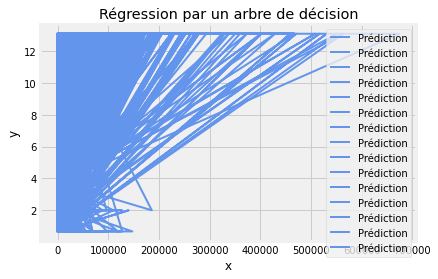

In [ ]:
# Affichage des résultats
plt.figure()
#plt.scatter(X, y, c="darkorange", label="Exemples d'apprentissage")
plt.plot(X_test, y_pred, color="cornflowerblue", label="Prédiction", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression par un arbre de décision")
plt.legend()
plt.show()

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
 
clf = LogisticRegression(random_state=0).fit(X_train, y_train.astype('int'))
predicted=clf.predict(X_test)

clf.predict_proba(X_test)


clf.score(X_train, y_train.astype('int'))
print(clf.predict(X_predict))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
predicted

array([0, 0, 7, ..., 0, 0, 1])


# SVM

In [ ]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(  X_train , y_train.astype('int'))
print(clf.predict(X_predict))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]


# SVR

In [ ]:
from sklearn.svm import SVR
import numpy as np


# Fit regression model
svr = SVR().fit(X_train, y_train  )
# Predict

svr.predict(X_predict)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.59378256])


# Random Forest Regressor

## Apprenstissage

In [ ]:
#On importe l'algorithme à partir de sklearn
from sklearn.ensemble import RandomForestRegressor
#On créé un Random Forest de 100 arbres 
rf = RandomForestRegressor(n_estimators = 100, random_state = 20)
#Et on lance le training sur notre dataset de train
rf.fit(X_train, y_train)
predicted=rf.predict(X_test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


## Prédiction

In [ ]:
y_pred=rf.predict(X_predict )

print(y_pred )
print(X_predict)

[0.4482148]
        CODPROD  MARQUE  AGE_VEHICULE  PUISSANCE  ...    TR     BG    ASS    IC
CODPROD     521       8             8          7  ...  True  False  False  True

[1 rows x 15 columns]


In [ ]:
#On va calculer plusieurs erreurs entre la valeur prédite et le score de bonheur réel (que nous avions stocké dans y_test)
#     - MAE : Mean Asolute Error
#     - MAPE : Mean Absolute Percentage Error 
# MAE 
erreurs = abs(y_pred -np.array( y_test))
print('Mean Absolute Error:', round(np.mean(erreurs), 2))

Mean Absolute Error: 3.56


In [ ]:
y_test_pred=rf.predict(X_test)
dfmergeytest = pd.merge(
    left=y_test,
    right=pd.DataFrame (y_test_pred),
    left_index=True,
    right_index=True,
)


pd.merge(
    left =dfmergeytest ,
    right = X_test,
        left_index=True,
    right_index=True,
)

,sp,0,CODPROD,MARQUE,AGE_VEHICULE,PUISSANCE,AGE_CLIENT,GOUVERNOR,GENRE,PRF,PRIME,SINISTRE,DOC,TR,BG,ASS,IC
677,0.544423,0.630512,521,1,5,5,50,1,0,9.0,13001.520,7078.332,False,False,True,True,False
916,15.133974,1.732987,521,5,24,4,38,7,1,31.0,4570.200,69165.288,True,False,True,True,True
2269,0.549615,0.130835,521,1,16,5,40,7,0,5.0,14916.594,8198.388,False,False,True,True,False
2443,0.999457,1.073515,571,1,4,5,62,7,0,32.0,4640.368,4637.848,False,False,True,True,False
509,0.254757,1.895390,572,4,10,7,63,7,0,2.0,14366.380,3659.936,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,1.533253,2.323507,521,12,4,5,48,1,1,4.0,29981.250,45968.835,True,False,True,True,True
1542,10.181786,0.110345,521,12,30,4,33,1,0,6.0,3170.538,32281.740,False,False,False,False,False
659,3.472554,0.394199,541,4,12,7,36,7,0,32.0,3663.010,12720.000,False,False,False,True,False
1056,0.605845,0.844570,541,12,22,9,54,7,1,31.0,4753.692,2880.000,False,False,False,False,False


## Interprétation des résultats

Text(0.5, 0, 'Relative Importance')

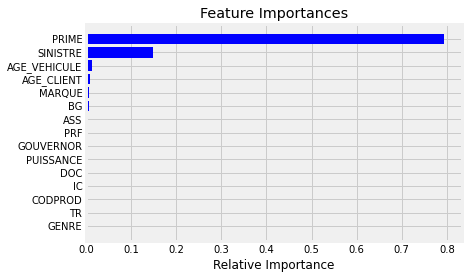

In [ ]:
#On conserve les noms de variable à part
liste_variables = list(dfinal.columns)
#On convertit le dataset en array
df = np.array(dfinal)

import matplotlib.pyplot as plt
importances = rf.feature_importances_
indices = np.argsort(importances)
# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.xlabel('Relative Importance')

In [ ]:
from flask import Flask
app = Flask(__name__)


@app.route('/')
def index():
    return "Welcome to Golab REST API"

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


# Test des models

In [278]:
def test(model , DOC  , TR  , BG ,	ASS   ,IC   ):
  d={ 
    'CODPROD':'521' ,
    'MARQUE': 'TOYOTA' ,
   'AGE_VEHICULE':8 ,	
   'PUISSANCE':7	 , 
   'AGE_CLIENT':40	 ,
    'GOUVERNOR':'TUNIS' , 
   	'GENRE':'0' , 	
   'PRF':30 ,
   'PRIME':5000 ,	'SINISTRE':2250 ,
    'DOC' : DOC , 'TR':TR , 		'BG' : BG ,	'ASS' : ASS ,'IC' : IC  

    }
 
  X_predict = pd.DataFrame(data=d,index=['CODPROD'])
 # print(X_predict)
  return  model.predict(transformer(X_predict))


In [279]:
print(test(rf , True  , False  , False ,	False   , False   ))
print(test(rf , False  , True  , False ,	False   , False   ))
print(test(rf , False  , False  , True ,	False   , False   ))
print(test(rf , False  , False  , False ,	True   , False   ))
print(test(rf , False  , False  , False ,	False   , True   ))


        CODPROD  MARQUE  AGE_VEHICULE  PUISSANCE  ...     TR     BG    ASS     IC
CODPROD     521  TOYOTA             8          7  ...  False  False  False  False

[1 rows x 15 columns]
[0.44801866]
        CODPROD  MARQUE  AGE_VEHICULE  PUISSANCE  ...    TR     BG    ASS     IC
CODPROD     521  TOYOTA             8          7  ...  True  False  False  False

[1 rows x 15 columns]
[0.4482148]
        CODPROD  MARQUE  AGE_VEHICULE  PUISSANCE  ...     TR    BG    ASS     IC
CODPROD     521  TOYOTA             8          7  ...  False  True  False  False

[1 rows x 15 columns]
[0.4486752]
        CODPROD  MARQUE  AGE_VEHICULE  PUISSANCE  ...     TR     BG   ASS     IC
CODPROD     521  TOYOTA             8          7  ...  False  False  True  False

[1 rows x 15 columns]
[0.44794519]
        CODPROD  MARQUE  AGE_VEHICULE  PUISSANCE  ...     TR     BG    ASS    IC
CODPROD     521  TOYOTA             8          7  ...  False  False  False  True

[1 rows x 15 columns]
[0.4482148]
